# Reviewing Gm/ID in gf180mcuD

Peter Kinget 
June 2025

Based on Boris Murmann's script. 

In [1]:
import numpy as np
import scipy.constants as sc
import matplotlib.pyplot as plt
from pygmid import Lookup as lk
%matplotlib widget

In [2]:
choice = 1  #set to 0 for nmos and 1 for pmos
#devices = ['nfet_06v0', 'pfet_06v0', 'nfet_03v3', 'pfet_03v3']
devices = ['nfet_03v3', 'pfet_03v3']
fet = lk('./'+devices[choice]+'.mat')

In [3]:
# Current Density Reference Current
# weak inversion
K_wi = np.array([ 28, 27 ]) # S/A
# strong inversion
K_si = np.array([10*np.sqrt(2e-6) , 6*np.sqrt(1.7e-6) ]) # S/A/sqrt(A)
# reference current
I0 = (K_si/K_wi)**2

In [4]:
# sweep variable vectors
w = fet['W']
l = fet['L']
vgs = fet['VGS']
vds = fet['VDS']
vsb = fet['VSB']

In [5]:
print(f'Transistor Width is {w} and Lengths are {l}')

Transistor Width is 5.0 and Lengths are [ 0.28  0.29  0.3   0.4   0.5   0.6   0.7   0.8   0.9   1.    2.    3.
  4.    5.    6.    7.    8.    9.   10.  ]


In [6]:
VDS1=1.65; VSB1=0

## Gm/ID versus ID/(W/L)

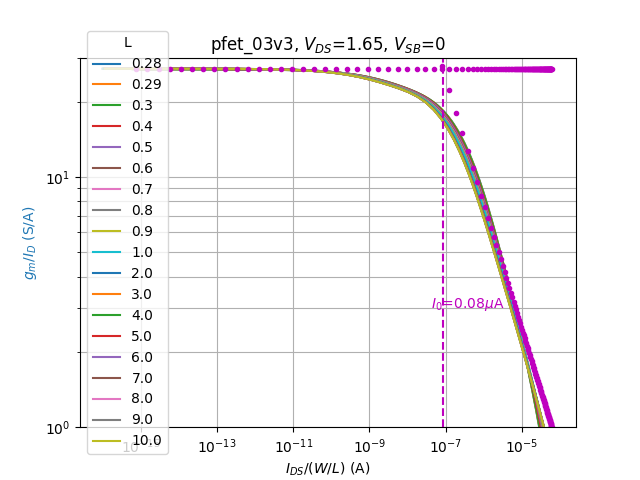

In [7]:
# plot gm/ID versus ID/(W/L)

fig, ax1 = plt.subplots()
ax1.grid(which='both')
ax1.set_xlabel('$I_{DS}/(W/L)$ (A)')
color = 'tab:blue'
ax1.set_ylabel('$g_m/I_D$ (S/A)', color=color)
# get data
gm_ids = fet.lookup('GM_ID', L=l, VDS=VDS1, VSB=VSB1)
ids = fet.lookup('ID', L=l, VDS=VDS1, VSB=VSB1)
ax1.loglog((ids / w * l[:, None]).T, gm_ids.T)
# tangents
# strong inversion
x = (ids / w * l[:, None]).T[:,1]
y = K_si[choice]/np.sqrt(x) 
ax1.loglog(x,y,'.',color='m')
# weak inversion
y = K_wi[choice] *np.ones(len(x))
ax1.loglog(x,y,'.',color='m')
# calculate I0
ax1.set_ylim(1, 30)
ax1.legend(loc='center left', title='L', labels=l.tolist())
# fig.tight_layout()
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
label = f"$I_0$={I0[choice]/1e-6:.2f}$\\mu$A"
ax1.text(I0[choice]/2, 3, label, color='m' )
plt.axvline(x=I0[choice], color='m', linestyle='--')
plt.show()

## Gm/ID versus Current Density

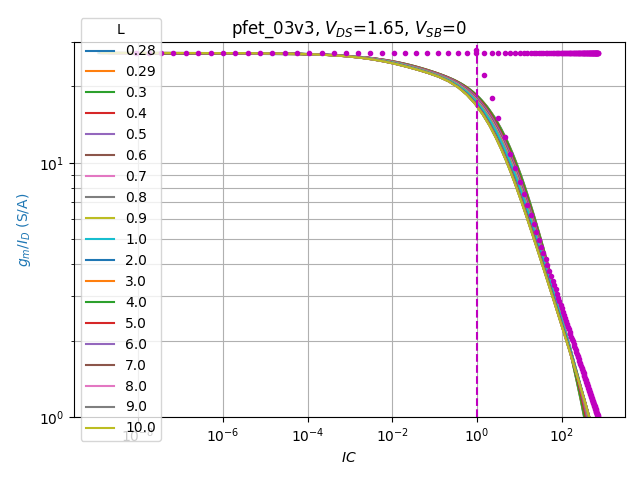

In [8]:
# plot gm/ID versus IC = ID/(W/L)/I0
# using I0 from previous cell

fig, ax1 = plt.subplots()
ax1.grid(which='both')
ax1.set_xlabel('$IC$')
color = 'tab:blue'
ax1.set_ylabel('$g_m/I_D$ (S/A)', color=color)

gm_ids = fet.lookup('GM_ID', L=l, VDS=VDS1, VSB=VSB1)
fts = fet.lookup('GM_CGG', L=l, VDS=VDS1, VSB=VSB1)
ids = fet.lookup('ID', L=l, VDS=VDS1, VSB=VSB1)
ax1.loglog((ids / I0[choice] / w * l[:, None]).T, gm_ids.T)
# ax2.semilogx((ids / w * l[:, None]).T, fts.T)

# tangents
# strong inversion
x = (ids / I0[choice] / w * l[:, None]).T[:,1]
K_si_0 = K_si[choice]/np.sqrt(I0[choice]) 
y = K_si_0/np.sqrt(x) 
ax1.loglog(x,y,'.',color='m')
# weak inversion
y = K_wi[choice] *np.ones(len(x))
ax1.loglog(x,y,'.',color='m')
plt.axvline(x=1, color='m', linestyle='--')

ax1.set_ylim(1, 30)
ax1.legend(loc='center left', title='L', labels=l.tolist())
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))

fig.tight_layout()


## Gm/ID and fT versus ID/(W/L)

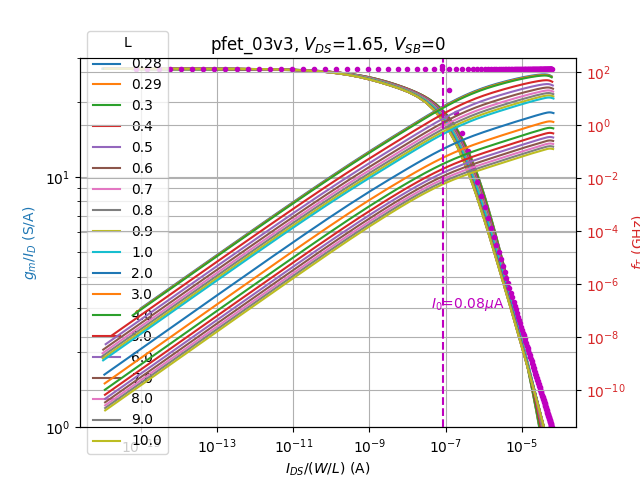

In [9]:
# plot gm/ID & fT versus ID/(W/L)

fig, ax1 = plt.subplots()
ax1.grid(which='both')
ax1.set_xlabel('$I_{DS}/(W/L)$ (A)')
color = 'tab:blue'
ax1.set_ylabel('$g_m/I_D$ (S/A)', color=color)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('$f_T$ (GHz)', color=color)

ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(True)
# get data
gm_ids = fet.lookup('GM_ID', L=l, VDS=VDS1, VSB=VSB1)
ids = fet.lookup('ID', L=l, VDS=VDS1, VSB=VSB1)
ax1.loglog((ids / w * l[:, None]).T, gm_ids.T)
# tangents
# strong inversion
x = (ids / w * l[:, None]).T[:,1]
y = K_si[choice]/np.sqrt(x) 
ax1.loglog(x,y,'.',color='m')
# weak inversion
y = K_wi[choice] *np.ones(len(x))
ax1.loglog(x,y,'.',color='m')
# calculate I0
ax1.set_ylim(1, 30)
ax1.legend(loc='center left', title='L', labels=l.tolist())

fts = fet.lookup('GM_CGG', L=l , VDS=VDS1, VSB=VSB1)
ax2.loglog((ids / w * l[:, None]).T, fts.T/1e9)

# fig.tight_layout()
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
label = f"$I_0$={I0[choice]/1e-6:.2f}$\\mu$A"
ax1.text(I0[choice]/2, 3, label, color='m' )
plt.axvline(x=I0[choice], color='m', linestyle='--')
plt.show()